name: Jui-Yang (Ray) Wang

Studeunt ID: 8552258069

### Section 1: 

In [1]:
#2022 AME508 assignment_1

import torch
import numpy as np
import torch.nn as nn
from torch.nn import Tanh as tanh
import torch.nn.functional as f

# sin and tanh can be called as torch.tanh(X), torch.sin(X). 

In [2]:
class neuralnetwork(nn.Module):                                                 # here we inherit Module as the basis of our ML code.
    def __init__(self, input_dim, width, output_dim, depth, activation="tanh"): # preset the activation function as tanh
        super().__init__()
        self.activation = activation                                            # need activation function in method part.
        
        self.mlp = nn.ModuleList()                                              # apply modulelist here, sequential can also be applied. 
        for i in range(depth):
            if i == 0:                                                          # first layer
                fc = nn.Linear(input_dim, width)                                
            elif i == depth - 1:                                                # last layer
                fc = nn.Linear(width, output_dim)                               
            else:                                                               # all hidden layers, the size should be width*width
                fc = nn.Linear(width, width)
          
          # nn.init.uniform_(m1.weight,a = -1, b = 1)
            nn.init.uniform_(fc.weight, a=-1, b=1)
            self.mlp.append(fc)                                                 #append all layers together


    def forward(self, X):                                                       #forward function, rolling the networks
        for i, fc in enumerate(self.mlp):
            X = fc(X)
            if i != len(self.mlp) - 1:
                if self.activation == "tanh":
                    X = torch.tanh(X)
                elif self.activation == "sin":
                    X = torch.sin(X)
                else:
                    raise ValueError("No activation function applied.")         #in case errors happening in the forward part
        return X

# model = neuralnetwork(input_dim=1, width=15, output_dim=1, depth=5, activation="tanh")
# print(model.m1.weight)

### Section 2:

2(a):　

In [9]:

input_dim = 1
width = np.array([5 ,10 ,20 ,40])
output_dim = 1
depth = 15
num_weight = []
num_bias = []

num_weight = input_dim*width + width*width*(depth-1-1) + output_dim*width       #depth-1: exclude the last layer which doesn't belong to hidden layer.    
num_bias = output_dim + width*(depth-1)                                         
tot_num = num_weight + num_bias

for idx in range(len(width)):
  print('For width = '+ str(width[idx]) + ', our neural network has total number of parameters = ' +str(tot_num[idx]) )

For width = 5, our neural network has total number of parameters = 406
For width = 10, our neural network has total number of parameters = 1461
For width = 20, our neural network has total number of parameters = 5521
For width = 40, our neural network has total number of parameters = 21441


2(b): 

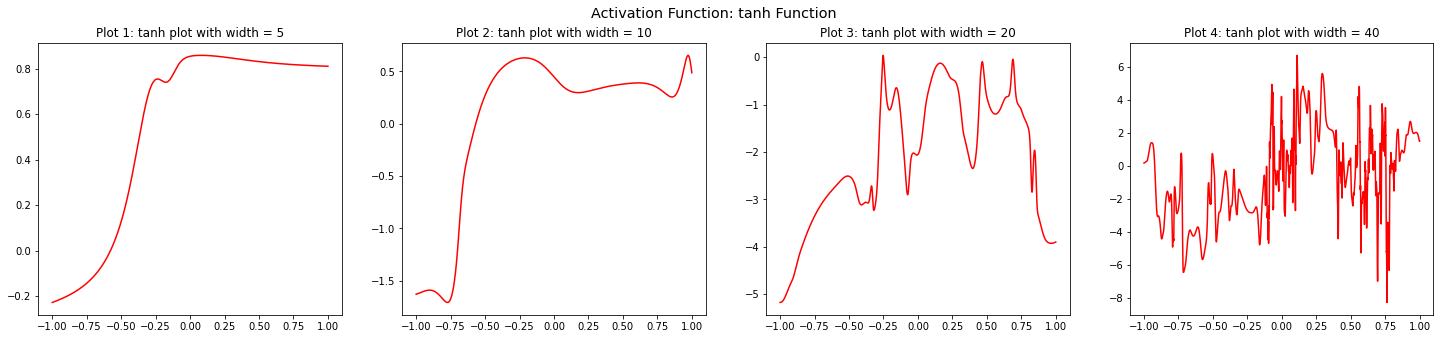

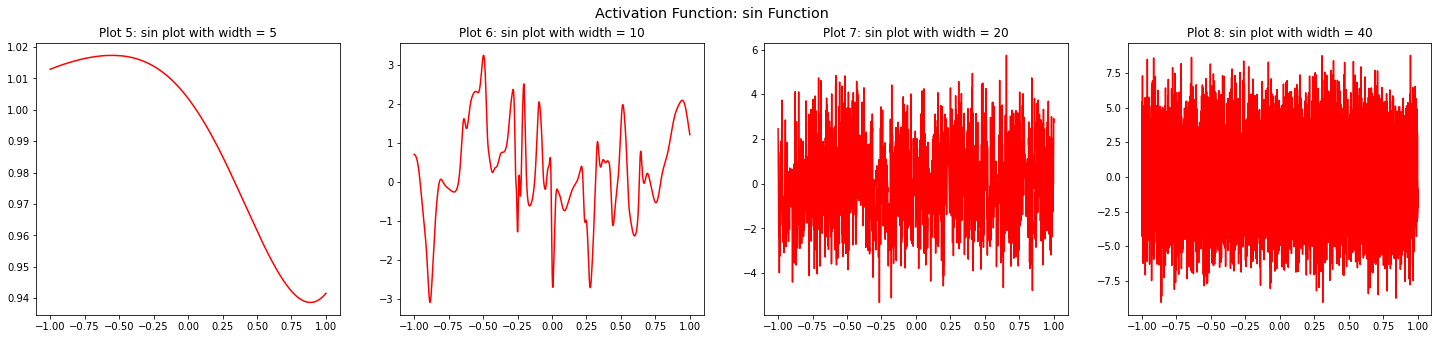

In [5]:
from numpy.core.function_base import linspace
import matplotlib.pyplot as plt

# x = torch.rand(10000, 1)*2-1
# x = linspace(-1, 1, 10000)
x = torch.linspace(-1, 1, steps=10000).unsqueeze(1)


fig, ax = plt.subplots(1, len(width), figsize=(25, 5))
fig.suptitle("Activation Function: tanh Function",fontsize = 'x-large')

for idx, W in enumerate(width):
  model = neuralnetwork(input_dim=1, width=W, output_dim=1, depth=15, activation="tanh")
  y = model(x).squeeze(1).detach().numpy()
# y = model(x).detach().numpy()
  ax[idx].plot(x.squeeze(1).numpy(),y, color= 'red')
  ax[idx].title.set_text('Plot '+str(idx+1) +': tanh plot with width = '+ str(W))


  # ax[idx].plot(x.squeeze(1).numpy(),y, marker='.', linestyle='none')
  # plt.xlabel('x')
  # plt.ylabel('y')
  

fig２, ax = plt.subplots(1, len(width), figsize=(25, 5))
fig２.suptitle("Activation Function: sin Function",fontsize = 'x-large')

for idx2, W2 in enumerate(width):
  model = neuralnetwork(input_dim=1, width=W2, output_dim=1, depth=15, activation="sin")
  y = model(x).squeeze(1).detach().numpy()
# y = model(x).detach().numpy()
  ax[idx2].plot(x.squeeze(1).numpy(),y, color= 'red')
  ax[idx2].title.set_text('Plot '+str(idx2+5) +': sin plot with width = '+ str(W2))

  # ax[idx].plot(x.squeeze(1).numpy(),y, marker='.', linestyle='none')
  # plt.xlabel('x')
  # plt.ylabel('y')


plt.show()


2(c):

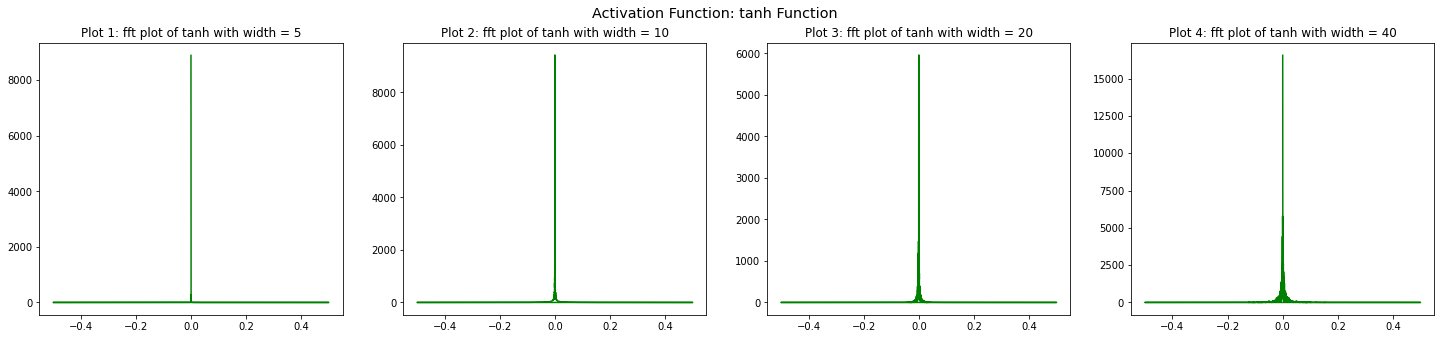

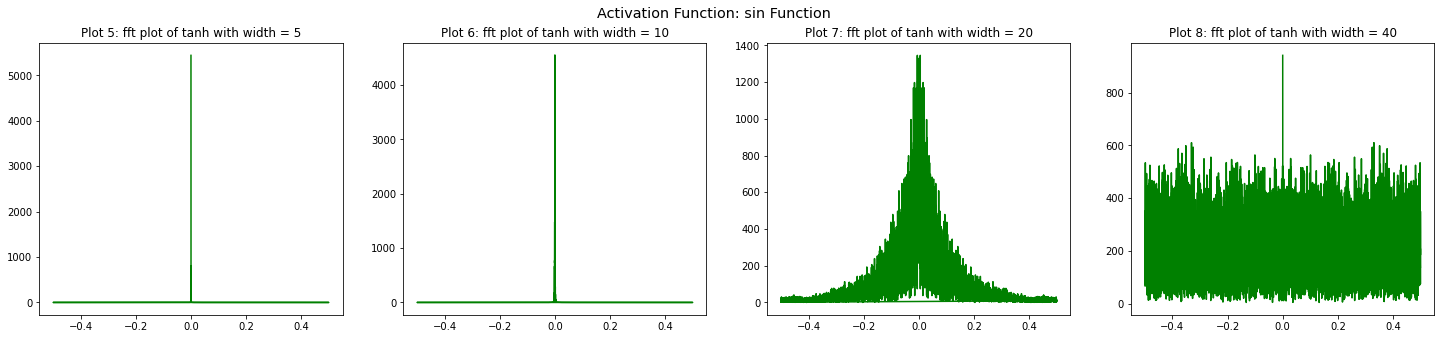

In [6]:

## for the plottings of tanh with fft
fig, ax = plt.subplots(1, len(width), figsize=(25, 5))
fig.suptitle("Activation Function: tanh Function", fontsize = 'x-large')

for idx, W in enumerate(width):
  model = neuralnetwork(input_dim=1, width=W, output_dim=1, depth=15, activation="tanh")
  y = model(x).squeeze(1).detach().numpy()
  y = np.abs(np.fft.fft(y, axis = 0))
  ax[idx].plot(np.fft.fftfreq(10000),np.abs(y), color= 'green')
  ax[idx].title.set_text('Plot '+str(idx+1) +': fft plot of tanh with width = '+ str(W)) 
  # after fft, we are only interested in the real part, which represents the power density function.
  # instead of time (s), x axis should be converted into frequency, with unit Hz


## for the plottings of sin with fft
fig2, ax = plt.subplots(1, len(width), figsize=(25, 5))
fig2.suptitle("Activation Function: sin Function", fontsize = 'x-large')

for idx, W2 in enumerate(width):
  model = neuralnetwork(input_dim=1, width=W2, output_dim=1, depth=15, activation="sin")
  y = model(x).squeeze(1).detach().numpy()
  y = np.abs(np.fft.fft(y, axis = 0))
  ax[idx].plot(np.fft.fftfreq(10000),np.abs(y), color= 'green')
  ax[idx].title.set_text('Plot '+str(idx+5) +': fft plot of tanh with width = '+ str(W2)) 



plt.show()

2(d):

Ans: Refers to the figures in 2(b). With width (number of neurons in each layer) becoming larger and larger, the output from our model gets more and more unstable. This phenomenon happens especially remarlable for sin function. A tiny increment in x would result in huge jump from model output at large width. 

2(e):

Ans: Activaiton function is to help neural networks learn complex patterns. Sin function gives more unstable output from our model, exhibiting more tinks than tanh function with larger number of width.

2(f):

Ans: When re-running the code, there's no difference at large number of width. For smaller number of width, we can tell the difference of the output distribution between each run. At larger number of width, the sin fuction shows the same output, oscillating around y = 0 axis. 

2(g): 

Ans: With larger number of width, the model is much more expressive to model a large class of non-linear continuous function, whereas with small number of width, the prediction might be poor. In the case of activation function, both activation functions are able to fit most of desired functions. The only difference is how fast/efficient and how well it learns (convergence).

